In [ ]:
!pip install pytesseract

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import pytesseract

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Question 1

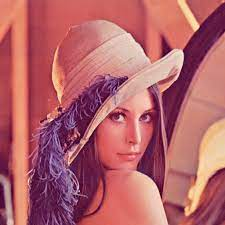

In [ ]:
image = cv2.imread('/content/drive/MyDrive/HW2/image1.jpg')

cv2_imshow(image)

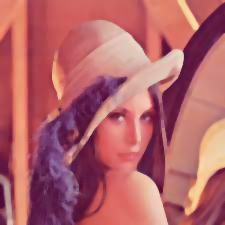

In [ ]:
# Median Filtered Image
median_filtered = cv2.medianBlur(image, 5)
cv2_imshow(median_filtered)

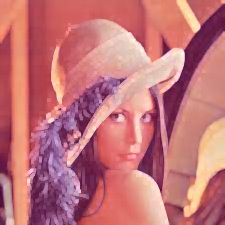

In [ ]:
# Max Filtered Image
max_filtered = cv2.dilate(image, None, iterations=1)
cv2_imshow(max_filtered)

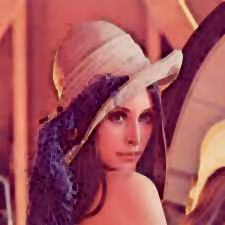

In [ ]:
# Min Filtered Image
min_filtered = cv2.erode(image, None, iterations=1)
cv2_imshow(min_filtered)

In [ ]:
cv2.waitKey(0)
cv2.destroyAllWindows()

Question 2

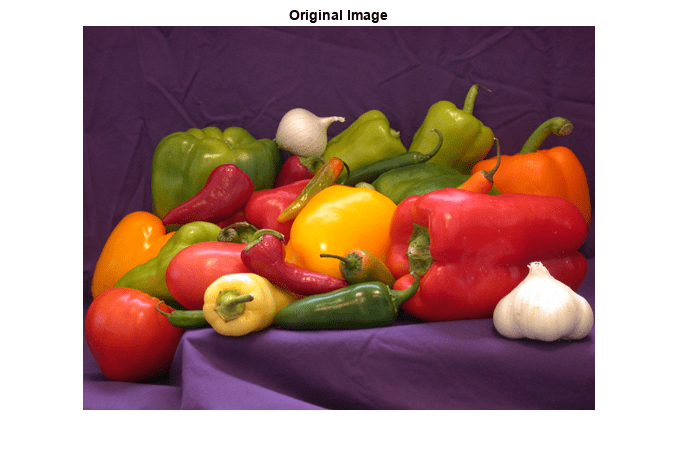

In [ ]:
image2 = cv2.imread('/content/drive/MyDrive/HW2/image2.jpg')
cv2_imshow(image2)

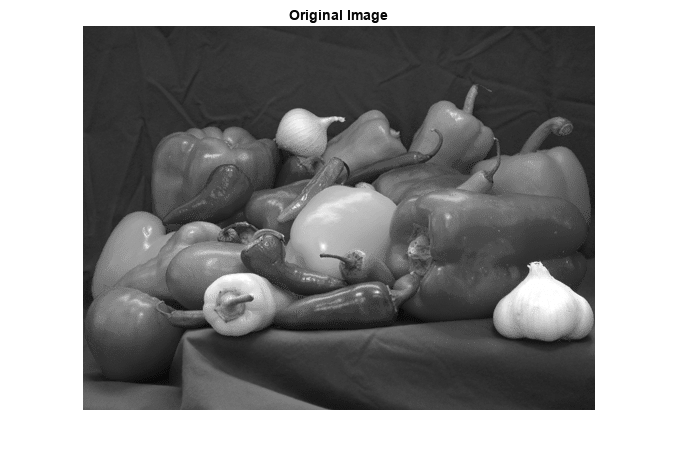

In [ ]:
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

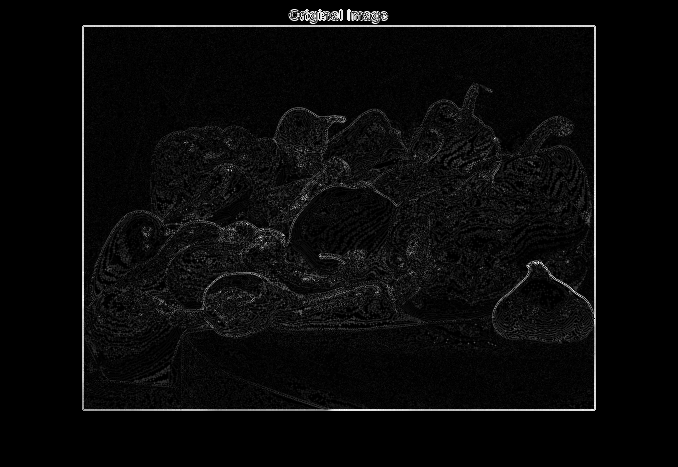

In [ ]:
laplacian = cv2.Laplacian(gray, cv2.CV_64F)

laplacian = np.uint8(np.absolute(laplacian))
cv2_imshow(laplacian)

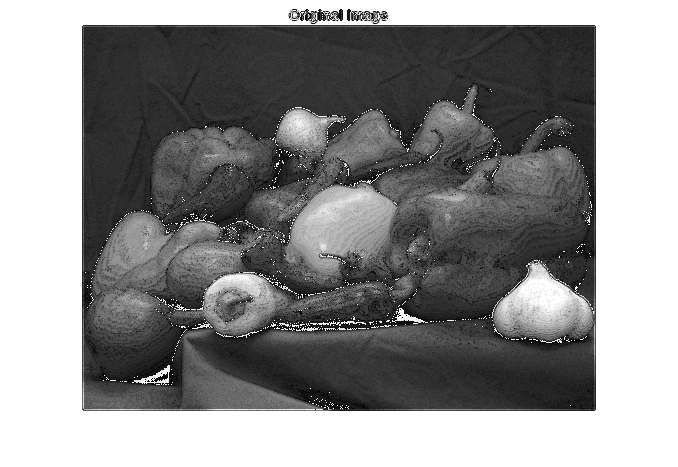

In [ ]:
sharpened = gray - laplacian
cv2_imshow(sharpened)

Question 3

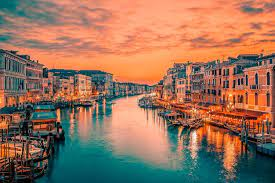

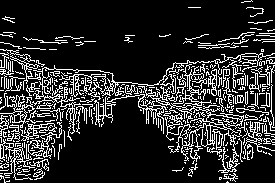

In [ ]:
image3 = cv2.imread('/content/drive/MyDrive/HW2/image3.jpg')
gray3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
edges3 = cv2.Canny(gray3, 100, 200)
cv2_imshow(image3)
cv2_imshow(edges3)

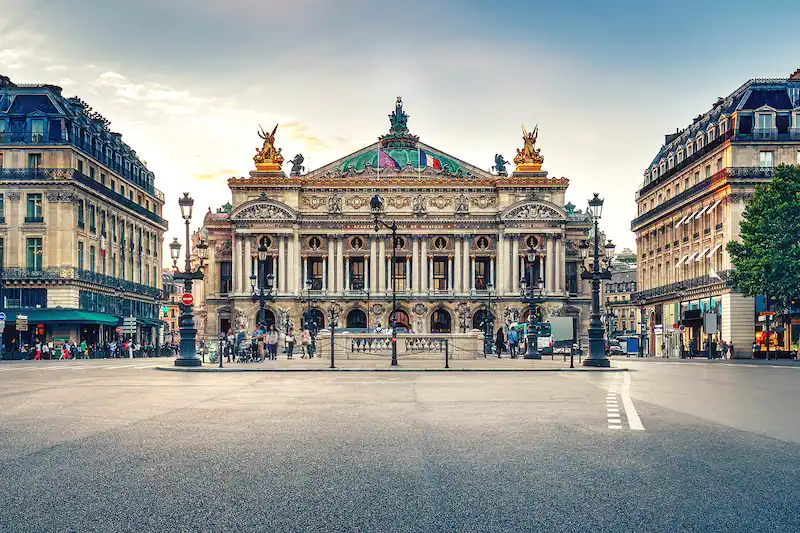

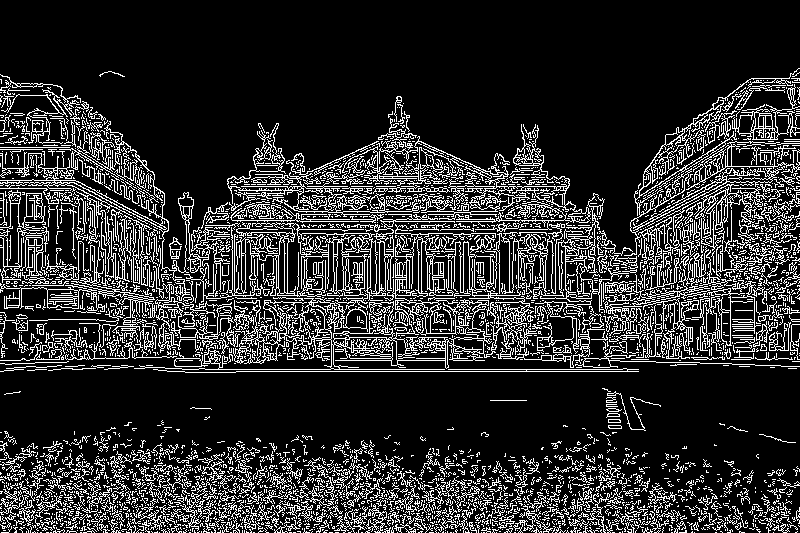

In [ ]:
image4 = cv2.imread('/content/drive/MyDrive/HW2/image4.jpg')
gray4 = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)
edges4 = cv2.Canny(gray4, 100, 200)
cv2_imshow(image4)
cv2_imshow(edges4)

Question 4

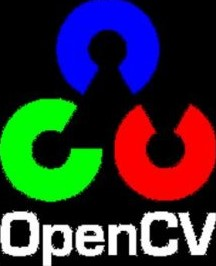

In [ ]:
image5 = cv2.imread('/content/drive/MyDrive/HW2/image5.jpg')
cv2_imshow(image5)

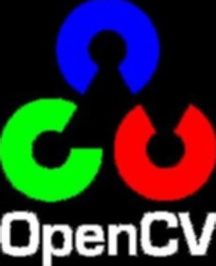

In [ ]:
# apply 3*3 average filter
average3 = cv2.blur(image5, (3, 3))
cv2_imshow(average3)

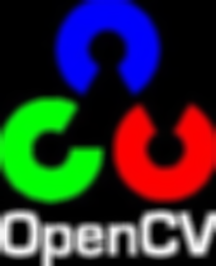

In [ ]:
# apply 9*9 average filter
average9 = cv2.blur(image5, (9, 9))
cv2_imshow(average9)

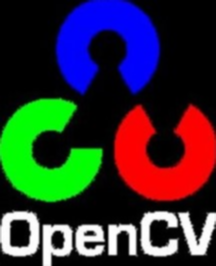

In [ ]:
# apply 3*3 guassian filter
gaussian3 = cv2.GaussianBlur(image5, (3, 3), 0)
cv2_imshow(gaussian3)

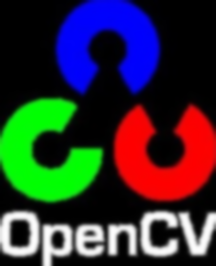

In [ ]:
# apply 9*9 guassian filter
gaussian9 = cv2.GaussianBlur(image5, (9, 9), 0)
cv2_imshow(gaussian9)

Question 5

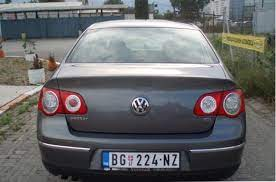

In [ ]:
image6_1 = cv2.imread('/content/drive/MyDrive/HW2/image6.1.jpg')
cv2_imshow(image6_1)

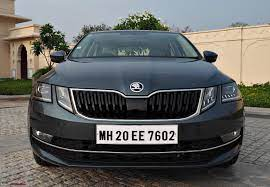

In [ ]:
image6_2 = cv2.imread('/content/drive/MyDrive/HW2/image6.2.jpg')
cv2_imshow(image6_2)

In [ ]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

In [ ]:
!apt-get install -y tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,930 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121658 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

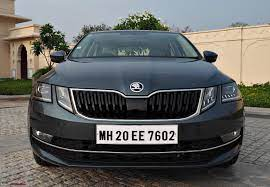

License Plate: MH20EE7602


In [ ]:
import cv2
import pytesseract
import re

def find_plate(image_path):
    image = cv2.imread(image_path)
    cv2_imshow(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    blur = cv2.GaussianBlur(binary, (9, 9), 0)
    edges = cv2.Canny(blur, 50, 50)

    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    min_a = 1000
    max_a = 2000
    plates = []

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        plate = image[y:y+h, x:x+w]
        area = w * h

        if min_a < area < max_a:
            plates.append((x, y, w, h))


    final_plate = None
    for plate in plates:
        x, y, w, h = plate
        final_plate = image[y:y+h, x:x+w]

        plate_text = pytesseract.image_to_string(final_plate, config='--psm 7')
        plate_text = re.sub('[^a-zA-Z0-9]', '', plate_text)

        if len(plate_text) > 6:
            return plate_text

    return None


image_path = '/content/drive/MyDrive/HW2/image6.2.jpg'

license_plate = find_plate(image_path)

if license_plate:
    print("License Plate:", license_plate)
else:
    print("No license plate")

Question 6

In [ ]:
!pip install face-recognition
!pip install easyocr
!pip install imutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=87fe1dc5662d503de419b04ad13e1beb8a13d8cab8beadedc5293af6df7fa5c1
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 21.6 MB/s eta 0:00:00


Enter the image name: 1


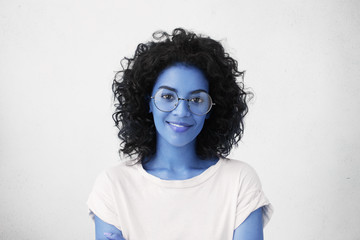

Enter the person's name: ana
Person's information saved successfully
-----------------------------------------
   Name                                      Face Encoding
0  ana  [-0.1559201180934906, 0.06637228280305862, -0....
Enter the image name: 2


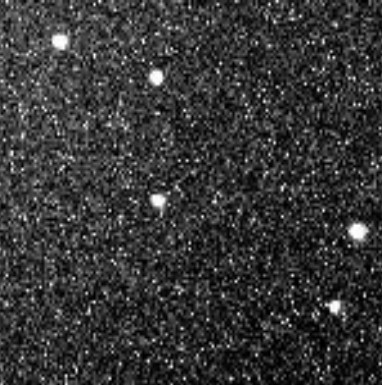

No face found
-----------------------------------------
   Name                                      Face Encoding
0  ana  [-0.1559201180934906, 0.06637228280305862, -0....
Enter the image name: 3


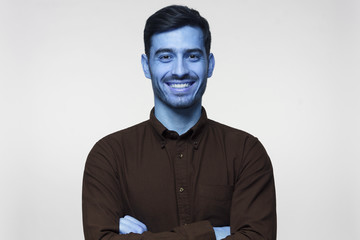

Enter the person's name: t
Person's information saved successfully
-----------------------------------------
   Name                                      Face Encoding
0  ana  [-0.1559201180934906, 0.06637228280305862, -0....
1    t  [-0.030758023262023926, 0.1314171403646469, 0....
Enter the image name: 1


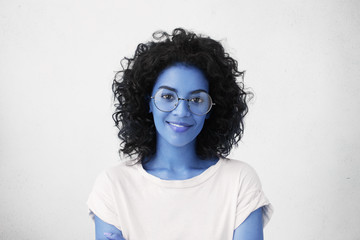

Person's information:
  Name
0  ana
-----------------------------------------
   Name                                      Face Encoding
0  ana  [-0.1559201180934906, 0.06637228280305862, -0....
1    t  [-0.030758023262023926, 0.1314171403646469, 0....
Enter the image name: q


FileNotFoundError: ignored

In [ ]:
import pandas as pd
import face_recognition

df = pd.DataFrame(columns=['Name', 'Face Encoding'])

def rec_person(image_path):
    image = face_recognition.load_image_file(image_path)
    cv2_imshow(image)
    face_encodings = face_recognition.face_encodings(image)

    if len(face_encodings) == 0:
        print("No face found")
        return

    face_encoding = face_encodings[0]

    match = df[df['Face Encoding'].apply(lambda x: face_recognition.compare_faces([x], face_encoding)[0])]

    if len(match) == 0:
        name = input("Enter the person's name: ")

        df.loc[len(df)] = [name, face_encoding]

        print("Person's information saved successfully")

    else:
        print("Person's information:")
        print(match[['Name']])

while(True):
  input1 = input("Enter the image name: ")
  rec_person('/content/drive/MyDrive/' + input1 + '.jpg')
  print("-----------------------------------------\n" ,df)

Question 7

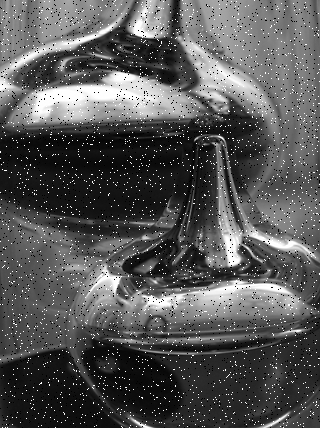

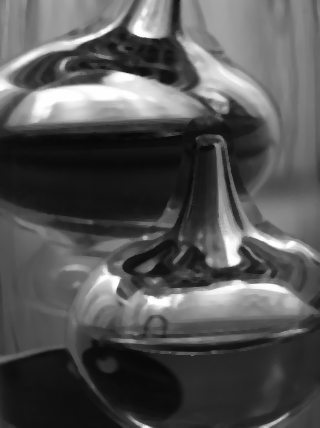

In [ ]:
image7 = cv2.imread('/content/drive/MyDrive/HW2/image7.jpg')
new_image7 = cv2.medianBlur(image7, 5)
cv2_imshow(image7)
cv2_imshow(new_image7)

Question 8

In [ ]:
# use unsharp masking
def sharpening(image, sigma=1.0, strength=1.5):
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    sharpened = cv2.addWeighted(image, 1.0 + strength, blurred, -strength, 0)
    return sharpened

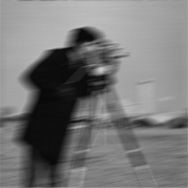

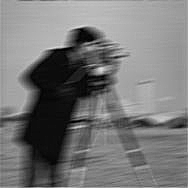

In [ ]:
image8_1 = cv2.imread('/content/drive/MyDrive/HW2/image8.1.jpg')
new_image8_1 = sharpening(image8_1)
cv2_imshow(image8_1)
cv2_imshow(new_image8_1)

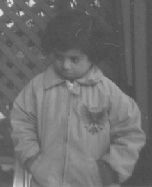

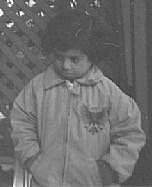

In [ ]:
image8_2 = cv2.imread('/content/drive/MyDrive/HW2/image8.2.jpg')
new_image8_2 = sharpening(image8_2)
cv2_imshow(image8_2)
cv2_imshow(new_image8_2)

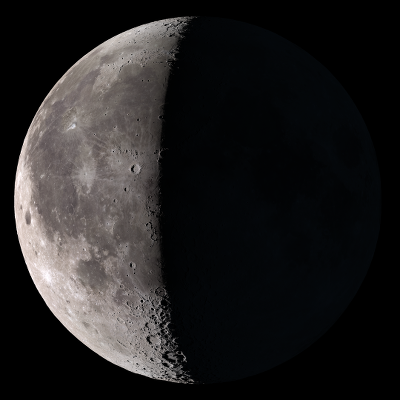

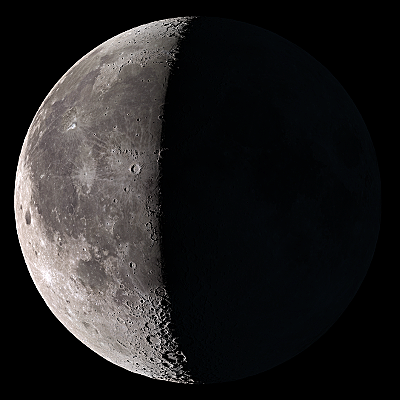

In [ ]:
image8_3 = cv2.imread('/content/drive/MyDrive/HW2/image8.3.jpg')
new_image8_3 = sharpening(image8_3)
cv2_imshow(image8_3)
cv2_imshow(new_image8_3)